#### Let's look at the volumes of regions where we are outside the uncertainty bounds of Farinotti et al. (2019)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = []
for i in range(273):
    cols.append(i)
    
# import sys

# !{sys.executable} -m pip install adjustText
from adjustText import adjust_text

In [2]:
df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')

In [3]:
df = df.dropna(subset = 'FMT')

In [4]:
important_regions = ['05','06','08','09','19']

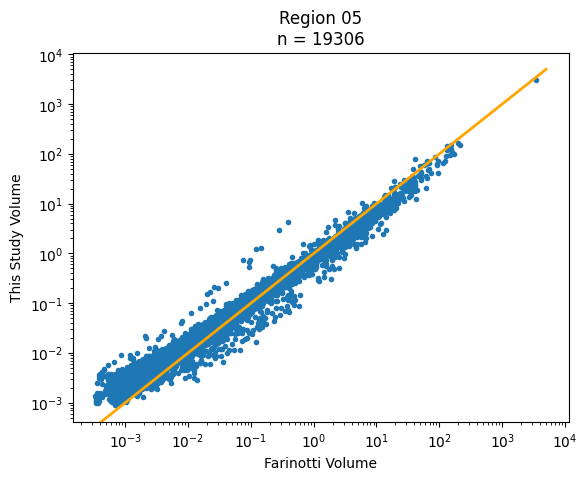

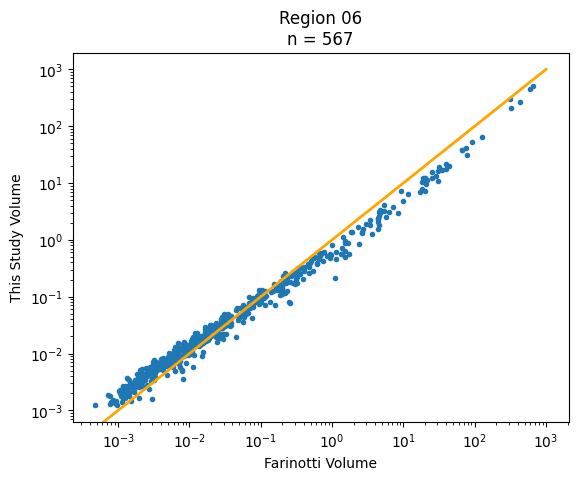

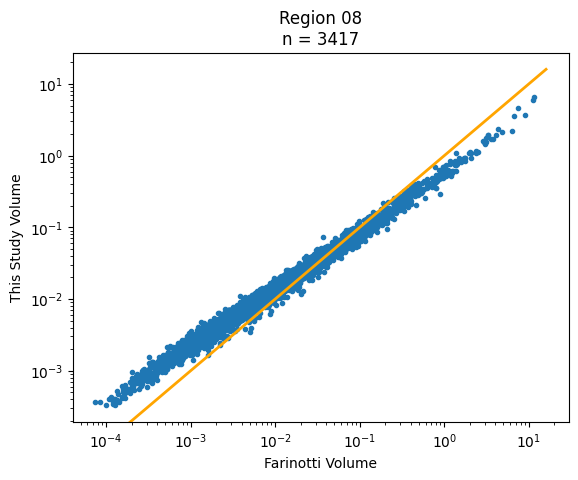

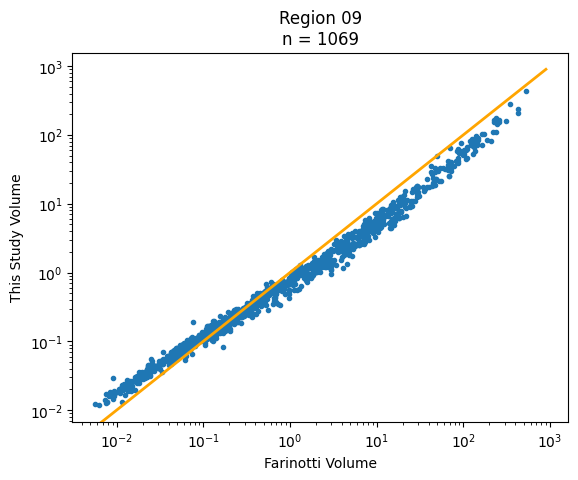

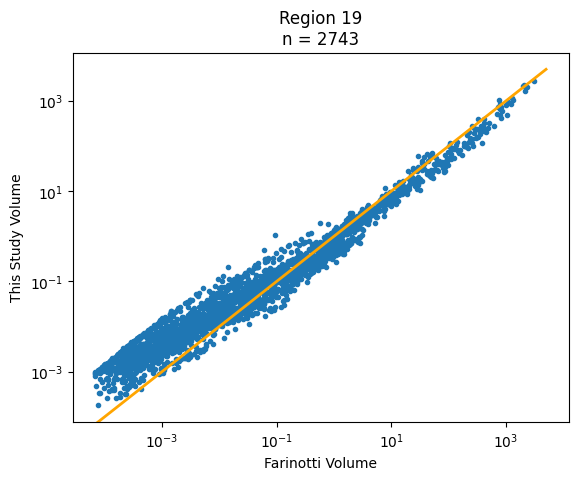

In [5]:
for reg in important_regions:
    
    dft = df[df['region'] == reg]

    x = dft['FMT'] / 1e3 * dft['Area']
    y = np.mean(dft[cols], axis = 1) * dft['Area']
#     xy = np.vstack([np.log10(x),np.log10(y)])
#     print('calculating density')
#     z = gaussian_kde(xy)(xy)
    plt.scatter(x,y,marker = '.')
    plt.xscale('log')
    plt.xlabel('Farinotti Volume')
    plt.yscale('log')
    plt.ylabel('This Study Volume')
    plt.title('Region ' + reg + f'\nn = {len(dft)}')
#     plt.show()
    if reg == '05':
        plt.plot((0,5000),(0,5000),c = 'orange',linewidth = 2)
    if reg == '06':
        plt.plot((0,1000),(0,1000),c = 'orange',linewidth = 2)
    if reg == '08':
        plt.plot((0,16),(0,16),c = 'orange',linewidth = 2)
    if reg == '09':
        plt.plot((0,900),(0,900),c = 'orange',linewidth = 2)
    if reg == '19':
        plt.plot((0,5000),(0,5000),c = 'orange',linewidth = 2)
    plt.show()

#### That doesn't feel super helpful. Let's look at some "residuals" with Farinotti

In [6]:
y = np.mean(df[cols],axis = 1) * df['Area']
x = df['FMT']/1e3 * df['Area']

In [7]:
df = pd.concat([df,pd.Series(y-x,name = 'r')],axis = 1)

In [8]:
df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Area_unc_270,Area_unc_271,Area_unc_272,var_eps_H,var_eps_R,var_eps_M,var_H,var_A,sig_k_ind,r
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.8230,63.6890,1,2,0.360,1936,...,0.312,0.298,0.336,0.000010,0.000011,0.000006,0.000028,0.003275,4.497801e-06,-0.001465
1,RGI60-01.00002,G213332E63404N,20090703,-9999999,-146.6680,63.4040,1,2,0.558,1713,...,0.483,0.462,0.521,0.000006,0.000037,0.000032,0.000075,0.006049,3.532151e-05,0.007802
2,RGI60-01.00003,G213920E63376N,20090703,-9999999,-146.0800,63.3760,1,2,1.685,1609,...,1.459,1.395,1.572,0.000006,0.000035,0.000030,0.000072,0.028419,2.552804e-04,0.016780
3,RGI60-01.00004,G213880E63381N,20090703,-9999999,-146.1200,63.3810,1,2,3.681,1273,...,3.188,3.048,3.434,0.000005,0.000040,0.000036,0.000082,0.084864,1.298306e-03,0.003962
4,RGI60-01.00005,G212943E63551N,20090703,-9999999,-147.0570,63.5510,1,2,2.573,1494,...,2.228,2.131,2.401,0.000005,0.000042,0.000039,0.000086,0.051403,6.968724e-04,0.014419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,G322268E53986S,20020502,-9999999,-37.7325,-53.9860,19,3,0.042,310,...,0.036,0.035,0.039,0.000010,0.000030,0.000024,0.000064,0.000162,3.346335e-07,0.000991
216497,RGI60-19.02749,G323864E54831S,20030207,-9999999,-36.1361,-54.8310,19,3,0.567,330,...,0.491,0.469,0.529,0.000016,0.000041,0.000037,0.000094,0.006186,4.452736e-05,0.015111
216498,RGI60-19.02750,G322698E54188S,20030207,-9999999,-37.3018,-54.1884,19,3,4.118,10,...,3.566,3.410,3.842,0.000008,0.000075,0.000082,0.000165,0.099296,3.407805e-03,0.089569
216499,RGI60-19.02751,G269573E68866S,19870101,-9999999,-90.4266,-68.8656,19,1,0.011,170,...,0.010,0.009,0.010,0.000022,0.000100,0.000121,0.000243,0.000025,2.779602e-07,0.000976


-3.138004382911063


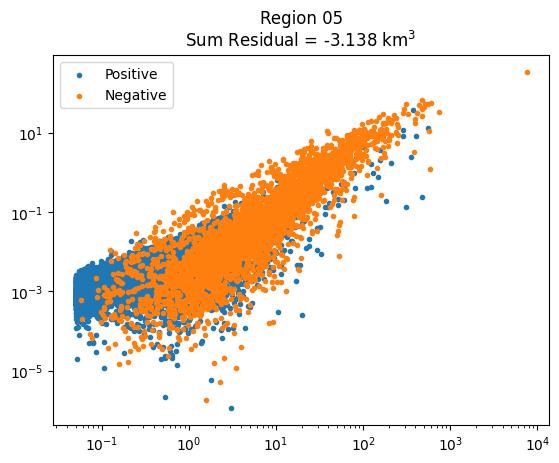

-1.1466869667997042


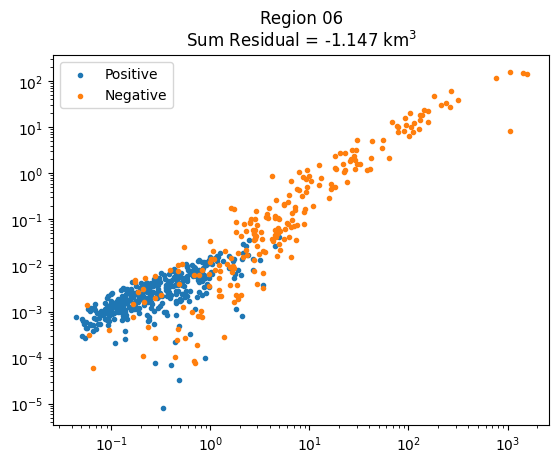

-0.09405441538268336


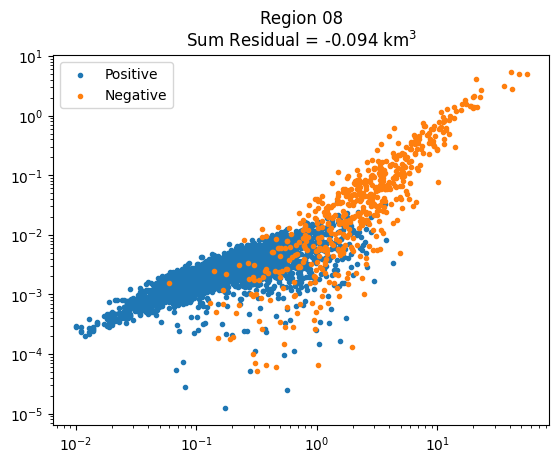

-5.9810595946485865


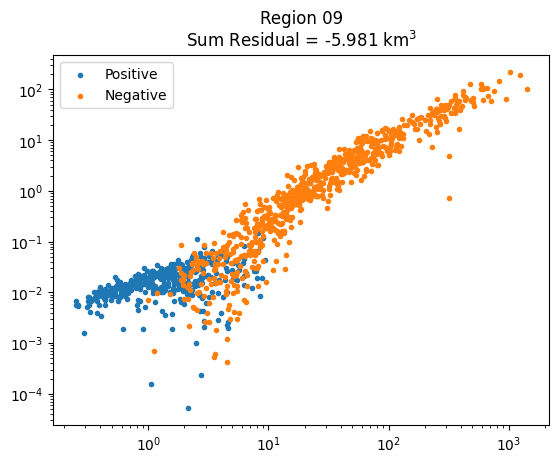

-10.168321715643142


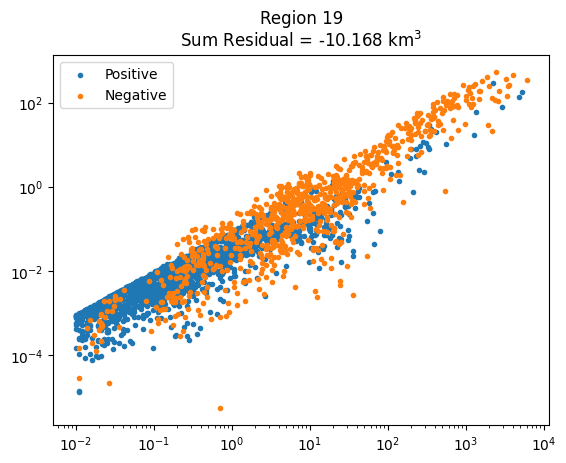

In [9]:
sum_residuals = []
for reg in important_regions:
    
    dft = df[df['region'] == reg]
    dft = dft.dropna(subset = 'r')
    
    if dft.empty:
        continue
    else:
        s = sum(dft['r'])
        sum_residuals.append(s)
        
#         print(sum(dft['r'])/ 1e3) 
        x = dft['Area']
        y = dft['r']
        print(sum(y)/1e3)
#         print('calculating density')
#         z = gaussian_kde(xy)(xy)
        plt.scatter(x,y,marker = '.',label = 'Positive')
        plt.scatter(x,-y,marker = '.',label = 'Negative')
        plt.xscale('log')
        plt.yscale('log')
#         plt.ylim(y.min(),y.max())
        plt.title('Region ' + reg + f'\nSum Residual = {np.round(s/1e3,3)} km$^3$')
        plt.legend()
        plt.show()
# print(sum(sum_residuals) / 1e3)

#### okay, we're working with $158\pm41$ from Farinotti and $135\pm2.445$ for our study

In [10]:
158 - 135

23

#### We're looking for $23\times10^3 $ km$^3$ difference. More than half of that can be accounted for by Russian Arctic, Greenland, and Antarctica. Millan quotes Russian arctic as a region that could benefit from better data analysis. Greenland and Antarctic periphery contain the largest glaciers, so it's no real surprise that these glaciers would cause the discrepancy. But why such a stark contrast?

In [11]:
sr = []
sa = []
mr = []
ma = []
r = []
for n,region in enumerate(df['region'].sort_values().unique()):
    dft = df[df['region'] == region]
    mr.append(np.mean(dft['r']/1e3))
    ma.append(np.mean(dft['Area']))
    sr.append(np.sum(dft['r']/1e3))
    sa.append(np.sum(dft['Area']))
    r.append(region)
#     print(f'sum residual = {s[n]}')
#     print(f'mean area = {np.round(a[n],3)}')
#     print('')

In [12]:
# ma = np.array(ma)
# sa = np.array(sa)
# mr = np.array(mr)
# sr = np.array(sr)
# # r = np.array(r)

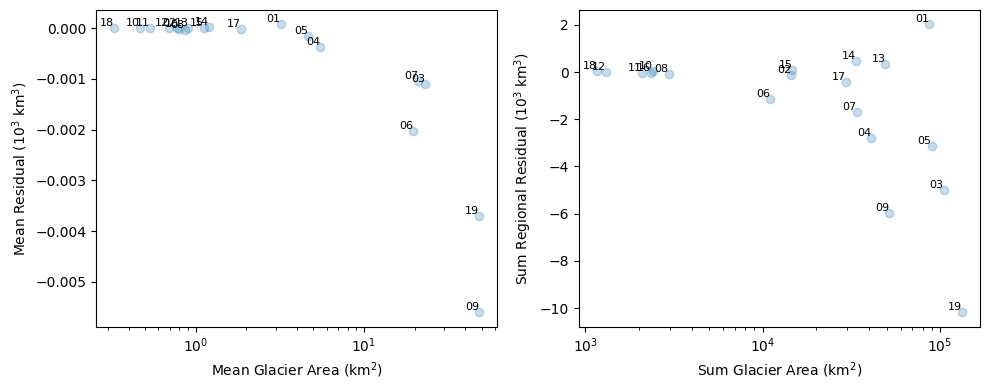

In [25]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
ax[0].scatter(ma,mr,alpha = 0.25)

for i, (x, y) in enumerate(zip(ma, mr)):
    ax[0].text(x,y, r[i], fontsize=8, ha='right', va='bottom')
# plt.text(x = ma, y = sa, s = r)
ax[0].set_xlabel('Mean Glacier Area (km$^2$)')
ax[0].set_ylabel('Mean Residual (10$^3$ km$^3$)')
ax[0].set_xscale('log')

ax[1].scatter(sa,sr,alpha = 0.25)

for i, (x, y) in enumerate(zip(sa, sr)):
    ax[1].text(x,y, r[i], fontsize=8, ha='right', va='bottom')
# plt.text(x = ma, y = sa, s = r)
ax[1].set_xlabel('Sum Glacier Area (km$^2$)')
ax[1].set_ylabel('Sum Regional Residual (10$^3$ km$^3$)')
ax[1].set_xscale('log')
plt.tight_layout()

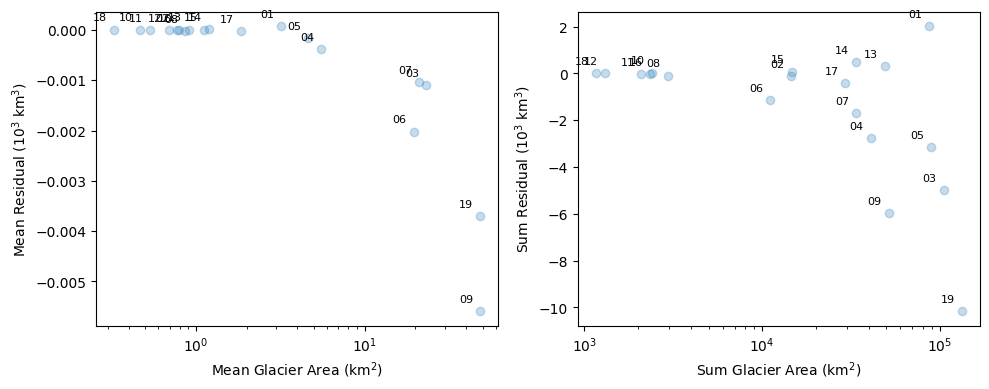

In [20]:

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot on ax[0]
scatter1 = ax[0].scatter(ma, mr, alpha=0.25)

# Text annotations on ax[0]
for x, y, r_val in zip(ma, mr, r):
    ax[0].annotate(r_val, (x, y), fontsize=8, ha='right', va='bottom', xytext=(-5, 5), textcoords='offset points')

ax[0].set_xlabel('Mean Glacier Area (km$^2$)')
ax[0].set_ylabel('Mean Residual (10$^3$ km$^3$)')
ax[0].set_xscale('log')

# Scatter plot on ax[1]
scatter2 = ax[1].scatter(sa, sr, alpha=0.25)

# Text annotations on ax[1]
for x, y, r_val in zip(sa, sr, r):
    ax[1].annotate(r_val, (x, y), fontsize=8, ha='right', va='bottom', xytext=(-5, 5), textcoords='offset points')

ax[1].set_xlabel('Sum Glacier Area (km$^2$)')
ax[1].set_ylabel('Sum Residual (10$^3$ km$^3$)')
ax[1].set_xscale('log')

plt.tight_layout()
plt.show()

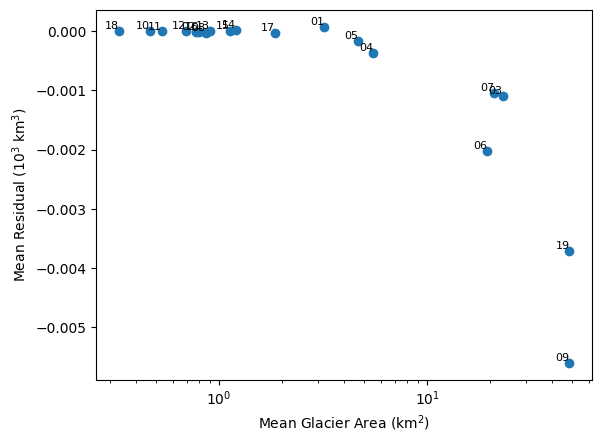

In [15]:
plt.scatter(ma,mr)
for i, (x, y) in enumerate(zip(ma, mr)):
    plt.text(x,y, r[i], fontsize=8, ha='right', va='bottom')
# plt.text(x = ma, y = sa, s = r)
plt.xlabel('Mean Glacier Area (km$^2$)')
plt.ylabel('Mean Residual (10$^3$ km$^3$)')
plt.xscale('log')

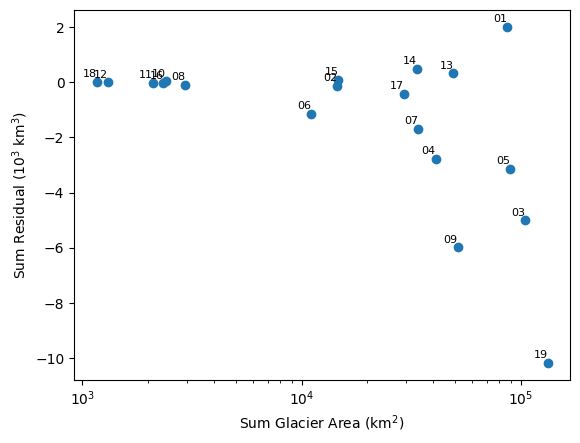

In [16]:
plt.scatter(sa,sr)
for i, (x, y) in enumerate(zip(sa, sr)):
    plt.text(x+0.1, y+0.1, r[i], fontsize=8, ha='right', va='bottom')
plt.xlabel('Sum Glacier Area (km$^2$)')
plt.ylabel('Sum Residual (10$^3$ km$^3$)')
plt.xscale('log')

In [17]:
df.to_pickle('/data/fast1/glacierml/data/final_df_r.pkl')